### Импорт библиотек

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import Sequential
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import os

### Визуализация данных

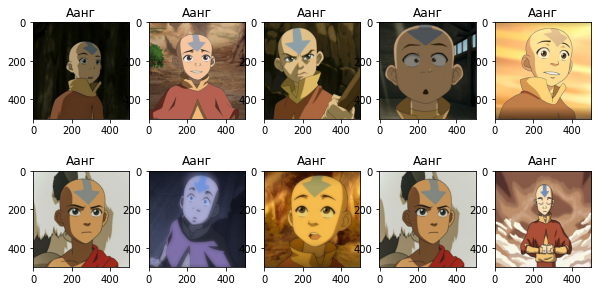

In [ ]:
k = os.listdir('Аанг и кора/train/Аанг') #  Получение списка файлов вв директории (папке)
plt.figure(figsize=(10, 5)) #  задание размеров изображений
for i in range(10): # Выводим 1-е 10 картинок
    img = image.load_img(f'Аанг и кора/train/Аанг/{k[i]}') # Загрузка изображения через f-строку если читать, то о tensorflow.keras.preprocessing.image
    plt.subplot(2, 5, i + 1) # Смещение по строке, столбцу для каждого изображения
    plt.imshow(img) # Отрисовка изображения
    plt.title('Аанг')

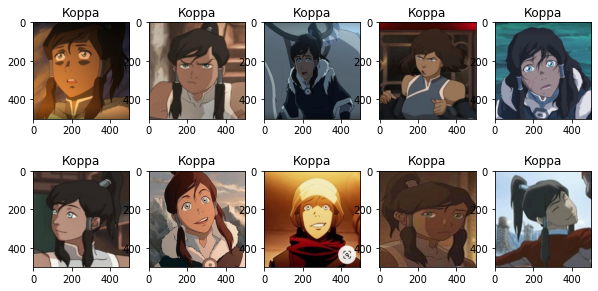

In [ ]:
k = os.listdir('Аанг и кора/train/корра/')
plt.figure(figsize=(10, 5))
for i in range(10):
    img = image.load_img(f'Аанг и кора/train/корра/{k[i]}')
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title('Корра')

### Подготовка данных

In [3]:
train = ImageDataGenerator(rescale=1/255) # Генерация пакетов данных тензорного изображения с дополнением данных в реальном времени.
# Ссылка на чтение
# https://runebook.dev/ru/docs/tensorflow/keras/preprocessing/image/imagedatagenerator
# https://ru-keras.com/image-preprocessing/

In [ ]:
train_dataset = train.flow_from_directory('Аанг и кора/train/',
                                         target_size=(500, 500),
                                         batch_size= 10,
                                         class_mode='binary')

Found 500 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'Аанг': 0, 'корра': 1}

#### Функция для подготовки данных confusion_metrix

In [ ]:
def prepare(model, dataset): # Функция подготовки изображений для последующей оценки через confusion_matrix, получает на вход обученную модель и набор данных
    y_pred = [] # Инициализация списка полученных предсказанных значений от модели
    for i in os.listdir('Аанг и кора/train/Аанг'): # проходимя по списку файлов вв директории (папке)
        img = image.load_img('Аанг и кора/train/Аанг/' + i) # загружаем каждое новое изображение из списка
        img = img.resize((500, 500)) # на всякий случай меняем размер
        X = image.img_to_array(img) # переводим изображение в массив значений от 0 до 255
        X = np.expand_dims(X, axis = 0)  # меняем размер массива под параметры модели
        val = model.predict(X)  # получаем предсказание от модели
        y_pred.append(val[0][0]) # добаваляем значение в список
    for i in os.listdir('Аанг и кора/train/корра'):
        img = image.load_img('Аанг и кора/train/корра/' + i)
        img = img.resize((500, 500))
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis = 0)
        val = model.predict(X)
        y_pred.append(val[0][0]) # до этого момента тоже самое только для корры
    y_pred = np.array(y_pred, dtype = np.int0) # преобразуем список в формат np.array()
    y_true = dataset.classes # Получаем из данных истинные значения для каждого из классов
    return y_pred, y_true # Возвращаем предсказанные и истинные значения

### Обучени моделей

#### 1-я модель

In [3]:
model = Sequential() # Модель линейный стек слоёв подробнее по ссылке https://ru-keras.com/guide-sequential/

model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(500,500,3))) # Добавление свёрточного слоя подробнее по ссылке https://ru-keras.com/convolutional-layers/
model.add(MaxPooling2D(pool_size=(2, 2))) # Пуллинг слой, подробнее по ссылке https://ru-keras.com/pooling-layers/
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Слой преобразования многомерного массива в одномерный

model.add(Dense(32)) # Полносвязный слой подробнее по ссылке https://ru-keras.com/core-layers/
model.add(Activation('relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary() # Вывод архитектуры модели

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 498, 498, 8)       224       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 249, 249, 8)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 247, 247, 16)      1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 123, 123, 16)     0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 242064)            0         
                                                                 
 dense_12 (Dense)            (None, 32)               

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Компиляция модели  https://ru-keras.com/guide-sequential/

In [ ]:
model.fit(train_dataset, epochs=20) # Обучение модели

Epoch 1/20
50/50 [==============================] - 33s 640ms/step - loss: 0.4924 - accuracy: 0.8140
Epoch 2/20
50/50 [==============================] - 18s 343ms/step - loss: 0.1869 - accuracy: 0.9380
Epoch 3/20
50/50 [==============================] - 18s 350ms/step - loss: 0.1385 - accuracy: 0.9640
Epoch 4/20
50/50 [==============================] - 17s 344ms/step - loss: 0.0413 - accuracy: 0.9860
Epoch 5/20
50/50 [==============================] - 32s 648ms/step - loss: 0.0319 - accuracy: 0.9880
Epoch 6/20
50/50 [==============================] - 34s 677ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 7/20
50/50 [==============================] - 33s 658ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 8/20
16/50 [========>.....................] - ETA: 23s - loss: 0.0013 - accuracy: 1.0000

KeyboardInterrupt: 

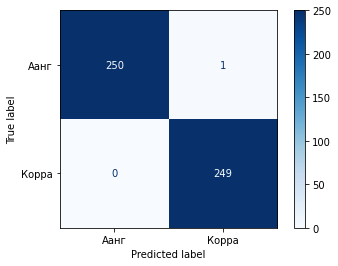

In [ ]:
labels = ['Аанг', 'Корра']
y_true, y_pred = prepare(model, train_dataset) # Вызов функции
cm = confusion_matrix(y_true, y_pred) # расчёт метрики  confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) # Визуализация мтрицы путаанницы подробнее по ссылке https://www.helenkapatsa.ru/matritsa-oshibok/

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model.save('Aang_and_Korra_model') # Сохранение модели

INFO:tensorflow:Assets written to: Aang_and_Korra_model/assets


#### 2-я модель

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=9, kernel_size=(3, 3), activation='relu', input_shape=(500,500,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(32))
model1.add(Activation('relu'))

model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 498, 498, 9)       252       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 249, 249, 9)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 558009)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                17856320  
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                      

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model1.fit(train_dataset, steps_per_epoch=None, epochs=15)

Epoch 1/15
50/50 [==============================] - 13s 251ms/step - loss: 8.5158 - accuracy: 0.7520
Epoch 2/15
50/50 [==============================] - 13s 256ms/step - loss: 0.3510 - accuracy: 0.9300
Epoch 3/15
50/50 [==============================] - 13s 264ms/step - loss: 0.1498 - accuracy: 0.9440
Epoch 4/15
50/50 [==============================] - 13s 268ms/step - loss: 0.0514 - accuracy: 0.9820
Epoch 5/15
50/50 [==============================] - 20s 408ms/step - loss: 0.0334 - accuracy: 0.9900
Epoch 6/15
50/50 [==============================] - 24s 482ms/step - loss: 0.1258 - accuracy: 0.9580
Epoch 7/15
50/50 [==============================] - 24s 476ms/step - loss: 0.0543 - accuracy: 0.9820
Epoch 8/15
50/50 [==============================] - 23s 449ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 9/15
50/50 [==============================] - 13s 260ms/step - loss: 0.0047 - accuracy: 0.9980
Epoch 10/15
50/50 [==============================] - 13s 260ms/step - loss: 0.0031 - accura

KeyboardInterrupt: 

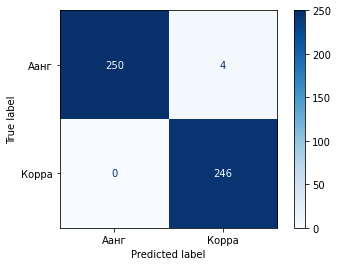

In [ ]:
labels = ['Аанг', 'Корра']
y_true, y_pred = prepare(model1, train_dataset)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model1.save('Aang_and_Korra_model_1')

INFO:tensorflow:Assets written to: Aang_and_Korra_model_1/assets


#### 3-я модель

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=3, kernel_size=(3, 3), activation='relu', input_shape=(500,500,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(16))
model2.add(Activation('relu'))

model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 498, 498, 3)       84        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 249, 249, 3)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 186003)            0         
                                                                 
 dense_8 (Dense)             (None, 16)                2976064   
                                                                 
 activation_4 (Activation)   (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                      

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.fit(train_dataset, steps_per_epoch=None, epochs=20)

Epoch 1/20
50/50 [==============================] - 16s 314ms/step - loss: 0.5857 - accuracy: 0.7240
Epoch 2/20
50/50 [==============================] - 15s 305ms/step - loss: 0.3161 - accuracy: 0.9100
Epoch 3/20
50/50 [==============================] - 16s 313ms/step - loss: 0.2568 - accuracy: 0.9380
Epoch 4/20
50/50 [==============================] - 17s 338ms/step - loss: 0.2566 - accuracy: 0.9400
Epoch 5/20
50/50 [==============================] - 15s 306ms/step - loss: 0.1205 - accuracy: 0.9660
Epoch 6/20
50/50 [==============================] - 15s 305ms/step - loss: 0.1219 - accuracy: 0.9780
Epoch 7/20
50/50 [==============================] - 16s 319ms/step - loss: 0.0359 - accuracy: 0.9860
Epoch 8/20
50/50 [==============================] - 18s 354ms/step - loss: 0.0243 - accuracy: 0.9920
Epoch 9/20
50/50 [==============================] - 15s 303ms/step - loss: 0.0167 - accuracy: 0.9960
Epoch 10/20
50/50 [==============================] - 15s 304ms/step - loss: 0.0106 - accura

KeyboardInterrupt: 

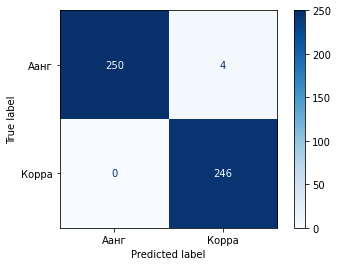

In [ ]:
labels = ['Аанг', 'Корра']
y_true, y_pred = prepare(model1, train_dataset)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model2.save('Aang_and_Korra_model_2')

INFO:tensorflow:Assets written to: Aang_and_Korra_model_2/assets


#### Проверка на новых данных:

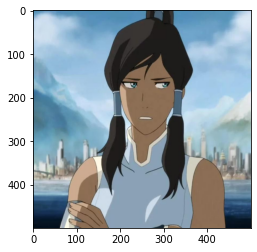

Модель1: Корра
Модель2: Корра
Модель3: Корра


In [ ]:
from tkinter import filedialog as fd # Взятие файла с пк, читает путь, подробнее https://younglinux.info/tkinter/dialogbox
filename = fd.askopenfilename()
img = image.load_img(filename)
img = img.resize((500, 500))
plt.imshow(img)
plt.show()   
X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0)

val = model.predict(X) # Предсказание модели
if val == 0:
    print('Модель 1: Аанг')
elif val == 1:
    print('Модель1: Корра')
    
val1 = model1.predict(X)
if val1 == 0:
    print('Модель 2: Аанг')
elif val1 == 1:
    print('Модель2: Корра')
    
val2 = model2.predict(X)
if val2 == 0:
    print('Модель 3: Аанг')
elif val2 == 1:
    print('Модель3: Корра')

####  Вывод

* Лучше всего на новых данных показала себя модель 3, а на confusion_matrix модель 1